**<p>1.1.1.a) </p>**
<p>$E_\xi(\theta) = \theta^2*\int_{0}^{\infty} x^2e^{-\theta x}dx = \frac{1}{\theta}\int_{0}^{\infty}y^2e^{y}dy = \frac{1}{\theta}\Gamma(3) = \frac{2}{\theta}$</p>
<p>$E_{\xi^2}(\theta) = \theta^2*\int_{0}^{\infty} x^3e^{-\theta x}dx = \frac{1}{\theta^2}\int_{0}^{\infty}y^3e^{y}dy = \frac{1}{\theta}\Gamma(4) = \frac{6}{\theta^2}$</p>
<p>$Var_\xi(\theta) = E_{\xi^2}(\theta) - {E_\xi(\theta)}^2 = \frac{2}{\theta^2}$</p>
<p>$\theta = 0.5: E_\xi = 4, E_{\xi^2} = 24, Var_\xi = 8$</p>
<p>$\theta = 2: E_\xi = 1, E_{\xi^2} = 1.5, Var_\xi = 0.5$</p>
<p>$\theta = 8: E_\xi = 0.25, E_{\xi^2} = \frac{3}{32}, Var_\xi = \frac{1}{32}
$</p>

In [2]:
#1.1.1.b) Используем гамма распределение с параметрами α = 2 и β = 1/θ для θ = 2
import numpy as np
import matplotlib.pyplot as plt
means = np.zeros(12)
sq_means = np.zeros(12)
vars = np.zeros(12)

for k in range(4,16):
  sample = np.random.gamma(2, 0.5, 2**k)
  means[k-4] = np.mean(sample)
  sq_means[k-4] = np.mean(np.square(sample))
  vars[k-4] = np.var(sample, ddof=1)

means[0]


np.float64(1.2129756867030057)

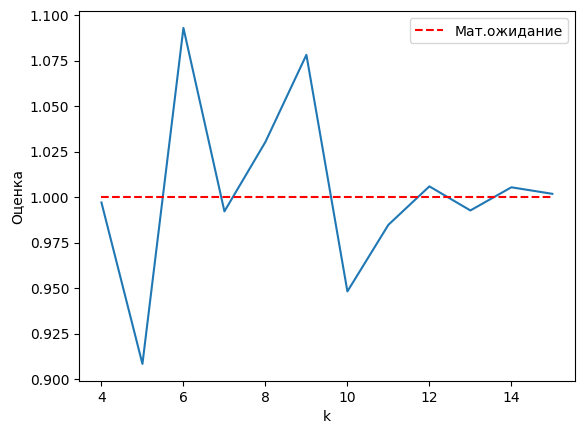

In [ ]:
#График для оценки мат. ожидания
plt.plot(np.arange(4, 16), means)
plt.hlines(y=1, xmin = 4, xmax = 15, color='red', linestyle='--', label='Мат.ожидание')
plt.xlabel('k')
plt.ylabel('Оценка')
plt.legend()
plt.show()

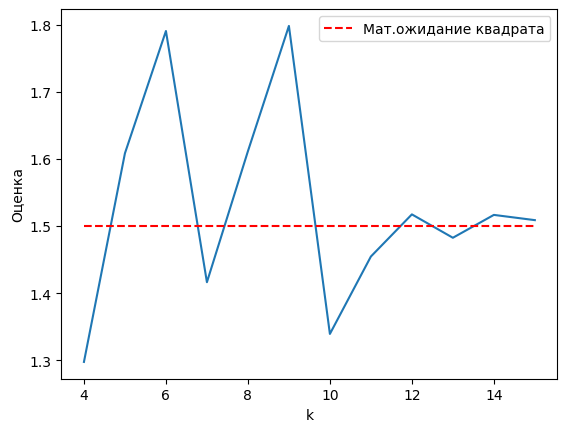

In [ ]:
#График для оценки мат. ожидания квадрата
plt.plot(np.arange(4, 16), sq_means)
plt.hlines(y=1.5, xmin = 4, xmax = 15, color='red', linestyle='--', label='Мат.ожидание квадрата')
plt.xlabel('k')
plt.ylabel('Оценка')
plt.legend()
plt.show()

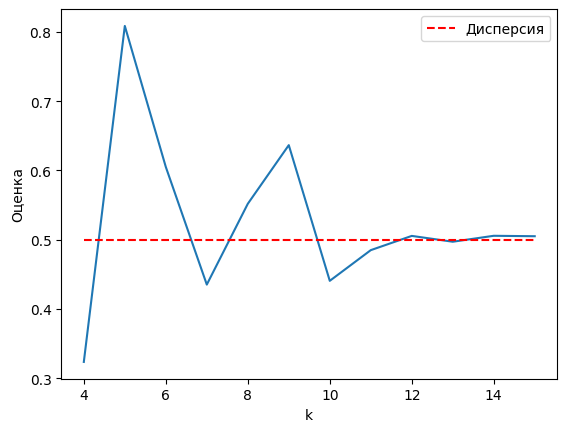

In [ ]:
#График для оценки дисперсии
plt.plot(np.arange(4, 16), vars)
plt.hlines(y=0.5, xmin = 4, xmax = 15, color='red', linestyle='--', label='Дисперсия')
plt.xlabel('k')
plt.ylabel('Оценка')
plt.legend()
plt.show()

**<p>1.1.2.a) </p>**
<p>Мода:</p>
<p>Функция плотности монотонно убывает, поэтому максимум достигается слева при a = 2</p>
<p>$\xi = a + Exp(1/\lambda)$</p>
<p>Математическое ожидание:</p>
<p>$E_\xi = 2 + E(Exp(0.5)) = 2.5$</p>
<p>Медиана: </p>
<p>Функция распределения: $F(x) = 1 - e^{-2(x-2)}$</p>
<p>$F(m) = 0.5 ⇒ e^{-2(m-2)} = 0.5 ⇒ m = 2 + 0.5*ln2$</p>


In [ ]:
#1.1.2.b)

from scipy import stats
sample1 = np.random.exponential(0.5, 20) + 2
sample2 = np.random.exponential(0.5, 10000) + 2
mean = float(np.mean(sample1)), float(np.mean(sample2))
mode = float(stats.mode(sample1)[0]), float(stats.mode(sample2)[0])
median = float(np.median(sample1)), float(np.median(sample2))

print('Оценки моды: ', mode)
print('Оценки среднего: ', mean)
print('Оценки медианы: ', median)

Оценки моды:  (2.079676193414969, 2.000032022957828)
Оценки среднего:  (2.555691131826775, 2.4995013677411277)
Оценки медианы:  (2.501454310311825, 2.3455025701640935)


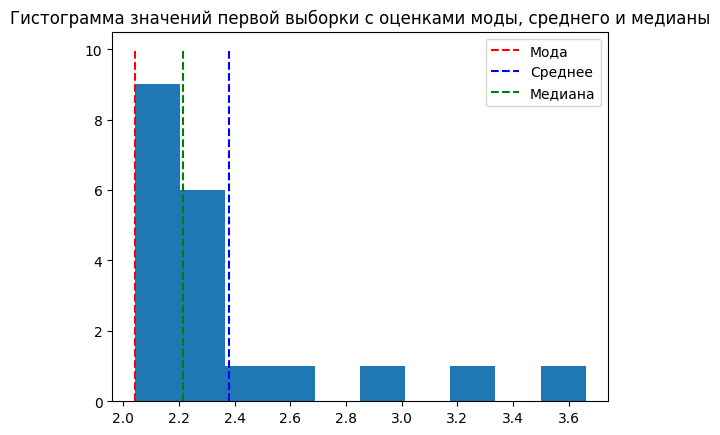

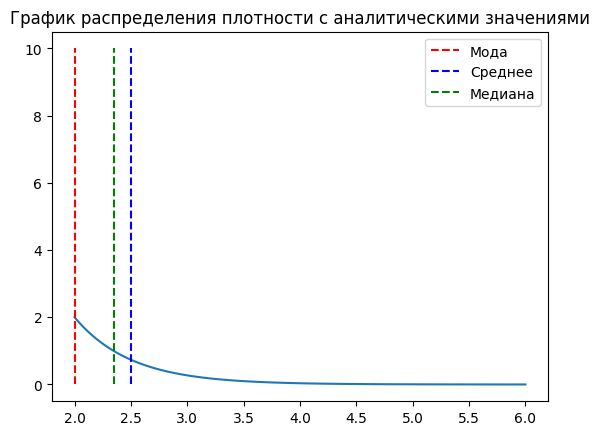

In [ ]:
#1.1.2.c)
#График для первой выборки
plt.hist(sample1)
plt.vlines(x=mode[0], ymin = 0, ymax = 10, color='red', linestyle='--', label='Мода')
plt.vlines(x=mean[0], ymin = 0, ymax = 10, color='blue', linestyle='--', label='Среднее')
plt.vlines(x=median[0], ymin = 0, ymax = 10, color='green', linestyle='--', label='Медиана')
plt.title('Гистограмма значений первой выборки с оценками моды, среднего и медианы')
plt.legend()
plt.show()

#График для функции плотности
x = np.linspace(2,6, 100)
y = 2*(np.e)**(-2*(x-2))
plt.plot(x,y)
plt.vlines(x=2, ymin = 0, ymax = 10, color='red', linestyle='--', label='Мода')
plt.vlines(x=2.5, ymin = 0, ymax = 10, color='blue', linestyle='--', label='Среднее')
plt.vlines(x=2+0.5*np.log(2), ymin = 0, ymax = 10, color='green', linestyle='--', label='Медиана')
plt.title('График распределения плотности с аналитическими значениями')
plt.legend()
plt.show()

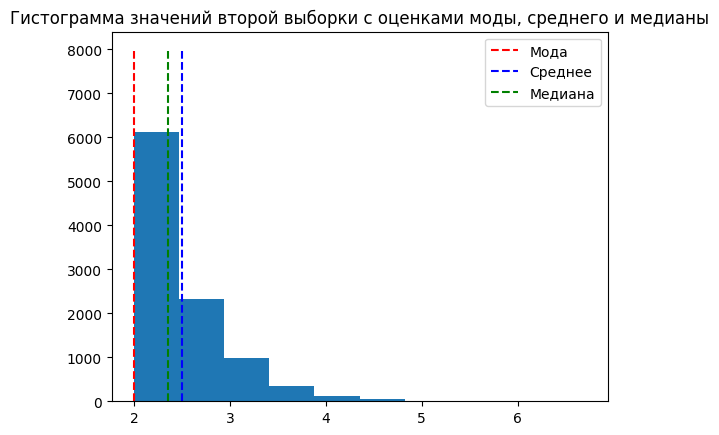

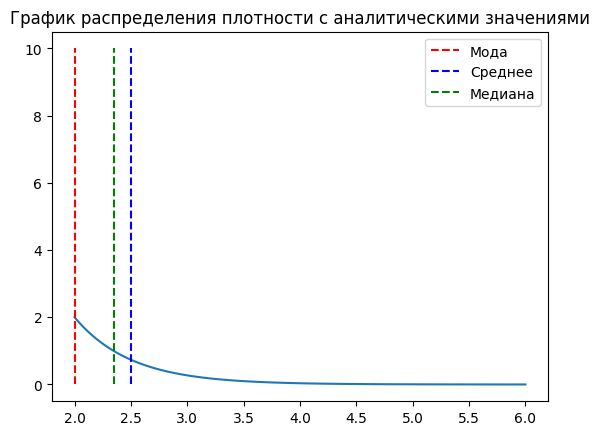

In [ ]:
#График для второй выборки
plt.hist(sample2)
plt.vlines(x=mode[1], ymin = 0, ymax = 8000, color='red', linestyle='--', label='Мода')
plt.vlines(x=mean[1], ymin = 0, ymax = 8000, color='blue', linestyle='--', label='Среднее')
plt.vlines(x=median[1], ymin = 0, ymax = 8000, color='green', linestyle='--', label='Медиана')
plt.title('Гистограмма значений второй выборки с оценками моды, среднего и медианы')
plt.legend()
plt.show()

#График для функции плотности
x = np.linspace(2, 6, 100)
y = 2*(np.e)**(-2*(x-2))
plt.plot(x,y)
plt.vlines(x=2, ymin = 0, ymax = 10, color='red', linestyle='--', label='Мода')
plt.vlines(x=2.5, ymin = 0, ymax = 10, color='blue', linestyle='--', label='Среднее')
plt.vlines(x=2+0.5*np.log(2), ymin = 0, ymax = 10, color='green', linestyle='--', label='Медиана')
plt.title('График распределения плотности с аналитическими значениями')
plt.legend()
plt.show()

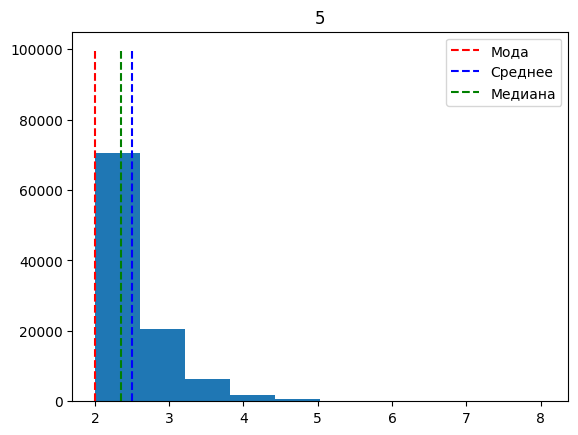

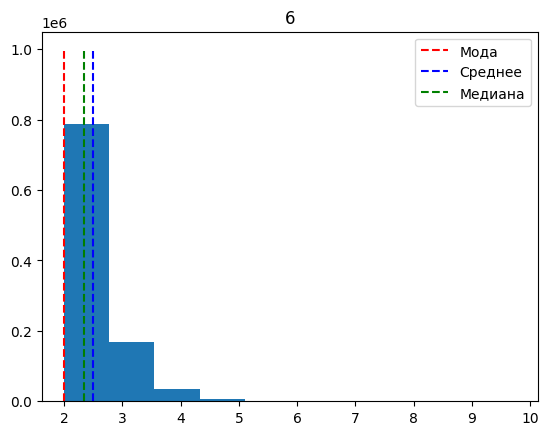

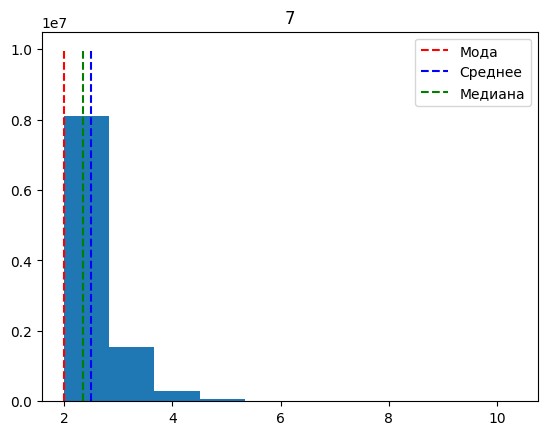

In [ ]:
#1.1.2.d)
for k in range(5,8):
  sample1 = np.random.exponential(0.5, 10**k) + 2
  mean = float(np.mean(sample1))
  mode = float(stats.mode(sample1)[0])
  median = float(np.median(sample1))
  plt.hist(sample1)
  plt.vlines(x=mode, ymin = 0, ymax = 10**k, color='red', linestyle='--', label='Мода')
  plt.vlines(x=mean, ymin = 0, ymax = 10**k, color='blue', linestyle='--', label='Среднее')
  plt.vlines(x=median, ymin = 0, ymax = 10**k, color='green', linestyle='--', label='Медиана')
  plt.title(k)
  plt.legend()
  plt.show()
#Значения остаются почти такими же, какой-то сходимости не видно, можно лишь заметить что растет концентрация точек в районе 2

**<p>1.2</p>**
<p>Маргиналы:</p>
<p>$P(\xi=-1)=2/5,P(\xi=0)=1/5,P(\xi=1)=2/5$</p>
<p>$P(\eta=k)=\dfrac{1}{2^k}$ для $\ge1$ (это геометрическое с p=1/2 на множестве ${1,2,\dots}$)</p>

<p>Математическое ожидание:</p>
<p>$\mathbb E[\xi]=(-1)\frac{2}{5}+0\cdot\frac{1}{5}+1\cdot\frac{2}{5}=0$</p>
<p>$\mathbb E[\eta]=\sum_{k=1}^\infty \frac{k}{2^k}=\frac{x}{(1-x)^2}\bigg|{x=1/2}=2$</p>

<p>Дисперсии:</p>
<p>$\mathbb E[\xi^2]=1^2\cdot\frac{2}{5}+0+1^2\cdot\frac{2}{5}=\frac{4}{5}=0.8$</p>
<p>$\operatorname{Var}(\xi)=\mathbb E[\xi^2]-(\mathbb E[\xi])^2=\tfrac{4}{5}=0.8$</p>
<p>$\mathbb E[\eta^2]=\sum_{k=1}^\infty k^2\frac{1}{2^k}=\frac{x(1+x)}{(1-x)^3}\bigg|_{x=1/2}=6$</p>
<p>$\operatorname{Var}(\eta)=6-(2)^2=2$</p>

<p>Ковариация и корреляция:</p>
<p>$\operatorname{Cov}(\xi,\eta)=0$</p>
<p>$\rho_{\xi\eta}=\frac{\operatorname{Cov}(\xi,\eta)}{\sqrt{\operatorname{Var}(\xi)\operatorname{Var}(\eta)}}=0$</p>

<p>Корреляционная матрица:</p>
<p>$\begin{pmatrix}
1 & 0 \\
0 & 1
\end{pmatrix}$</p>

<p>Ковариационная матрица:</p>
<p>$\begin{pmatrix}
0.8 & 0 \\
0 & 2
\end{pmatrix}$</p>




In [11]:
n = 100000
# генерация eta: геометрическое с p=0.5 (1,2,...)
eta = np.random.geometric(p=0.5, size=n)
# генерация xi: независимая категориальная величина с пробелами [-1,0,1]
xi = np.random.choice([-1,0,1], size=n, p=[2/5, 1/5, 2/5])
# корелляционная матрица
corr = np.corrcoef(xi, eta)
print(corr)
# ковариационная матрица
cov = np.cov(xi, eta, ddof=0)
print(cov)

[[1.         0.00294228]
 [0.00294228 1.        ]]
[[0.80105933 0.00371538]
 [0.00371538 1.99055697]]
